In [ ]:
!pip install qiskit[all]
!pip install qiskit-aer

  Using cached qiskit_aer-0.17.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.3 kB)
Using cached qiskit_aer-0.17.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.4 MB)


In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# 1개의 큐비트

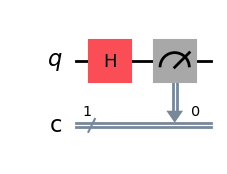

In [ ]:
qc = QuantumCircuit(1, 1) # 큐비트 1개 사용, 클래식 비트(측정 결과를 저장할 공간) 1개 사용
qc.h(0) # 아다마르 게이트를 큐비트 0번에 적용
qc.measure(0, 0) # 큐비트 0번을 측정하여 클래식 비트 0번에 저장
qc.draw('mpl') # 시각화

|0⟩ 상태의 큐비트에 Hadamard 게이트를 적용하면, 큐비트는 ( |0⟩ + |1⟩ ) / √2 상태가 되어, 측정 시 50% 확률로 |0⟩, 50% 확률로 |1⟩ 중 하나로 “붕괴”하고, 그 결과는 클래식 비트에 저장된다.

In [ ]:
sim = AerSimulator()
result = sim.run(qc, shots=100).result() # 회로를 100번 반복 실행하고 결과 반환
counts = result.get_counts() # 각 측정 결과가 몇 번 나왔는지 세어봄
print(counts)

{'0': 48, '1': 52}


# 2개의 큐비트

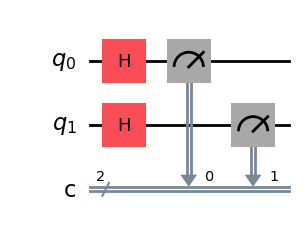

In [ ]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.h(1)
qc.measure([0, 1], [0, 1]) # 큐비트 0, 1 -> 클래식비트 0, 1
qc.draw('mpl')

두 개의 |0⟩ 상태 큐비트에 Hadamard 게이트를 각각 적용하면, 각 큐비트는 ( |0⟩ + |1⟩ ) / √2 상태가 되어, 두 큐비트는 전체적으로 ( |00⟩ + |01⟩ + |10⟩ + |11⟩ ) / 2 의 중첩 상태가 된다.
이 상태를 측정하면, 각 조합인 00, 01, 10, 11이 약 25% 확률로 랜덤하게 발생하며,
그 결과는 각각의 클래식 비트에 저장된다.

In [ ]:
sim = AerSimulator()
result = sim.run(qc, shots=100).result()
counts = result.get_counts()
print(counts)

{'11': 22, '01': 27, '00': 25, '10': 26}
